 
 ####  <U> <center style ="color:black" > Institut Supérieur d'Informatique et des Technologies de Communication de Hammam Sousse </center></U>
 <img src="logo.png" width="100" height="100" align="center"/>
<hr size=5 width=100%>

<div style="padding:10px; border:5px double black; background-color:white; ">   <center>    <h1><font color='red' align="center" >Classification des Tweets</font></h1></center> </div>

<center><h2><font color='blue' align="center">Realisée par : Mariem Gmach </font></h2></center>
<hr size=5 width=50%>

#####  <center><font color='black' align="center" >2020/2021</font></center>
<hr size=5 width=100% >

# Importation des bibliothéques

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
from tweepy import API
from tweepy import OAuthHandler

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tweepy import Cursor
from tweepy.streaming import StreamListener

from tweepy import Stream
import csv

import json
import sys

import tweepy
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import datetime
import en_core_web_sm
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to C:\Users\maryem
[nltk_data]     gmach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\maryem
[nltk_data]     gmach\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Authentification

In [2]:

CONSUMER_KEY    ='VGc9wwQu73No9ZTkDhOrjara1'
CONSUMER_SECRET ='o0VjEqqIxQkrp1WkFfpB41kdmTwtmLKzDAOHlEcpFxHoygEUDu'

# Access:
ACCESS_TOKEN  ='1327352036090933248-l4k9fbhbFSuV7gZGSgRmGavr5mvdDD'
ACCESS_SECRET ='y6ss9QTjJLRVuAiLVW08f8w2p0DyXQtNsqLV55ufyHtI7'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Extraction des données

In [8]:

filename ='Tweet'+'.csv'
with open (filename, 'w', newline='',encoding="utf-8") as csvFile:
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['TweetId','screen_name','Tweet'])
    #using tweepy Cursor
    for tweet in tweepy.Cursor(api.search, q='health', lang = 'en').items(3000):
    #writing a csv file
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        csvWriter.writerow([tweet.id,tweet.user.name,tweets_decoded])
        
    for tweet in tweepy.Cursor(api.search, q='econmic', lang = 'en').items(3000):
    #writing a csv file
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        csvWriter.writerow([tweet.id,tweet.user.name,tweets_decoded])
        
    for tweet in tweepy.Cursor(api.search, q='social', lang = 'en').items(3000):
    #writing a csv file
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        csvWriter.writerow([tweet.id,tweet.user.name,tweets_decoded])
        
    for tweet in tweepy.Cursor(api.search, q='culture', lang = 'en').items(3000):
    #writing a csv file
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        csvWriter.writerow([tweet.id,tweet.user.name,tweets_decoded])
   


In [9]:
tweet = pd.read_csv('Tweet.csv')

In [10]:
tweet

,TweetId,screen_name,Tweet
0,1338523620075851778,Cambia Health,RT @HealthEcho: Excellent piece on @cityblockh...
1,1338523619505434625,Vape N Fan,RT @BeschlossDC: White House staff members are...
2,1338523619199213576,"Alexis, Winter Warqueer 🏴🏳️‍⚧️",RT @BBCBweaking: Huohhhh. New vawiant of cowon...
3,1338523618976833536,Jeannette MacGregor,RT @GlobalEdmonton: Alberta health officials a...
4,1338523618624454675,〽️arc,Show your girl off its good for their health
...,...,...,...
9096,1338524985187512331,New Mexico History Museum,RT @NewMexico: So much incredible history and ...
9097,1338524984478732288,Sam Johnson,So grateful to have joined this dynamic team l...
9098,1338524982952030208,crouchin’ on the outside,I’ve said it before and I’ll say it again if y...
9099,1338524979089043461,EveryVoteMatters,RT @eugenegu: @realDonaldTrump Dropping the us...


# Cleaning the tweets

In [30]:
def clean_text(df, text ,name):
    df[name] = df[name].str.lower()
    df[name] = df[name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|([0-9])", "", elem))
    df[text] = df[text].str.lower()
    df[text]= df[text].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|([0-9])", "", elem))
    return df

clean_tweets = clean_text(tweet, 'screen_name','Tweet')
clean_tweets.head(20)

,TweetId,screen_name,Tweet
0,1338523620075851778,cambia health,excellent piece on s groundbreaking work to ...
1,1338523619505434625,vape n fan,white house staff members are now reportedly...
2,1338523619199213576,alexis winter warqueer,huohhhh new vawiant of cowonaviwus identifie...
3,1338523618976833536,jeannette macgregor,alberta health officials are scheduled to pr...
4,1338523618624454675,arc,show your girl off its good for their health
5,1338523617253093376,ptwills,our emergency department at glan clwyd hospi...
6,1338523617064148994,balbir singh,for all covid complaints about noncompliance...
7,1338523616682586114,dr pepper code konaa,im teaming up with and to give away an emb...
8,1338523616355495940,raheel,uk informs who after cases of new covid var...
9,1338523614849732611,mordechai d rodgold,ashkenazi last weekend i spoke with my collea...


In [31]:
clean_tweets.to_csv('TweetClean.csv')

In [32]:
tweetclean = pd.read_csv('TweetClean.csv')

In [33]:
tweetclean

,Unnamed: 0,TweetId,screen_name,Tweet
0,0,1338523620075851778,cambia health,excellent piece on s groundbreaking work to ...
1,1,1338523619505434625,vape n fan,white house staff members are now reportedly...
2,2,1338523619199213576,alexis winter warqueer,huohhhh new vawiant of cowonaviwus identifie...
3,3,1338523618976833536,jeannette macgregor,alberta health officials are scheduled to pr...
4,4,1338523618624454675,arc,show your girl off its good for their health
...,...,...,...,...
9096,9096,1338524985187512331,new mexico history museum,so much incredible history and culture to le...
9097,9097,1338524984478732288,sam johnson,so grateful to have joined this dynamic team l...
9098,9098,1338524982952030208,crouchin on the outside,ive said it before and ill say it again if you...
9099,9099,1338524979089043461,everyvotematters,dropping the use of human beings as mascots...


In [34]:
toclean = pd.read_csv('TweetClean.csv')
deduped = toclean.drop_duplicates(['screen_name','Tweet'])
deduped.to_csv('Tweetfinal.csv')

In [35]:
tweet = pd.read_csv('Tweetfinal.csv')

In [36]:
tweet

,Unnamed: 0,Unnamed: 0.1,TweetId,screen_name,Tweet
0,0,0,1338523620075851778,cambia health,excellent piece on s groundbreaking work to ...
1,1,1,1338523619505434625,vape n fan,white house staff members are now reportedly...
2,2,2,1338523619199213576,alexis winter warqueer,huohhhh new vawiant of cowonaviwus identifie...
3,3,3,1338523618976833536,jeannette macgregor,alberta health officials are scheduled to pr...
4,4,4,1338523618624454675,arc,show your girl off its good for their health
...,...,...,...,...,...
8972,9096,9096,1338524985187512331,new mexico history museum,so much incredible history and culture to le...
8973,9097,9097,1338524984478732288,sam johnson,so grateful to have joined this dynamic team l...
8974,9098,9098,1338524982952030208,crouchin on the outside,ive said it before and ill say it again if you...
8975,9099,9099,1338524979089043461,everyvotematters,dropping the use of human beings as mascots...


# Defining the set of words

In [40]:
economy_related_words = '''agriculture infrastructure capitalism trading service sector technology  economical supply 
                          industrialism efficiency frugality retrenchment downsizing   credit debit value 
                         economize   save  economically
                         economies sluggish rise   rising spending conserve trend 
                         low-management  decline   industry impact poor  
                            profession    surplus   fall
                         declining  accelerating interest sectors balance stability productivity increase rates
                            pushing expanding stabilize  rate industrial borrowing struggling
                           deficit predicted    increasing  data
                          economizer analysts investment market-based economy   debt free enterprise
                         medium  exchange metric savepoint scarcity capital bank company stockholder fund business  
                         asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics
                         bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation 
                         quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital
                         mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution
                         bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter 
                         distribution downturn economist'''

In [38]:
social_related_words = '''sociable, gregarious societal friendly society socialization political  sociality 
                        interpersonal  ethnic socially party welfare public community socialist societies development
                            network humans socialism collective personal corporation social constructivism
                        relations volition citizenship brute   attitude rights socio 
                        socioeconomic ethics civic communal marital  sociale socialized communities     
                         policy   unions        
                        institutions values     governmental   organizations jamboree 
                         festivity    fairness  support  care  
                         sides   activism     unsocial psychosocial 
                        socializing psychological distributional  demographic  participation reunion 
                        partygoer partyism festive power network gala housewarming celebration counterparty   social-war
                        particularist interactional ideational asocial'''

In [43]:
culture_related_words  = ''' ethnicity heritage modernity spirituality marxismmaterial culture 
                           ethos nationality humanism romanticism civilisation traditionalism genetics
                        kinship heredity marriage   indigenous  archeology  acculturate  
                       ontogenesis viniculture modern clothes     rooted 
                       cicero societies history roots influence geography historical folk origins 
                       phenomenon teleology ancient aspects perspective liberalism nowadays community style unique prevalent describes 
                         today  origin   modernity beliefs  genre barbarian ethnic 
                       colonization cultural universal organization western-civilization structuralism  culture 
                       heathen pagan transculturation culture peasant classicist nativism anarchy ungrown philosophic cult  
                       consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism  
                       mongolian cosmopolitan epistemology lifestyles diversity chauvinism westernization materialism vernacular 
                       homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse
                       puritanism modernism intellectualism  exclusiveness elitism  colonialism  
                       pentecostalism paganism nationwide expansion rural  auxesis kimono 
                       culturize alethophobia nettlebed japanification  dongyi clannishness insularity hybridity
                       westernisation foreignness worldview exclusionism enculturation ethnocentrism  confucianist vulgarization
                       shintoism  westernism denominationalism    deracination
                        eurocentrism  cosmologies  emotiveness bohemianism territorialism
                       philosophical-doctrine ethnic minority social-darwinism  theory cultural evolution belief systemfolk music 
                       traditional art house karl-marx   theorymedia  
                       film-theory art history museum studies cultural artifact'''

In [39]:
health_related_words = '''disease obesity world health organization medicine nutrition well-being exercise welfare wellness health care public health 
                     nursing stress safety hygiene research social healthy condition aids epidemiology healthiness wellbeing
                     care illness medical dieteducation infectious disease environmental healthcare physical fitness hospitals 
                     health care provider doctors healthy community design insurance sanitation human body patient mental health
                      medicare agriculture health science fitnesshealth policy  weight loss physical therapy psychology pharmacy
                     metabolic organism human lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family
                     eudaimonia eudaemonia air house prevention genetics public families poor needs treatment communicable disease 
                     study protection malaria development food priority management healthful mental provide department administration
                     programs help assistance funding environment improving emergency need program affected schools private mental illness 
                     treat diseases preparedness perinatal fertility sickness veterinary sanitary pharmacists behavioral midwives
                     gerontology infertility hospitalization midwifery cholesterol childcare pediatrician pediatrics medicaid asthma 
                     pensions sicknesses push-up physical education body-mass-index eat well gymnastic apparatus tune up good morning 
                     bathing low blood-pressure heart attack health club ride-bike you feel good eczema urticaria dermatitis sunburn overwork 
                     manufacturing medical sociology need exercise run'''

# Preprocessing the sets.
###  Tokenizing and removing stop words from the sets.

In [23]:
!pip3 install -U spacy
!python3 -m spacy download en_core_web_sm

Python est introuvable. Exécutez sans argument pour procéder à l


In [44]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [45]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

### delete duplicates

In [46]:
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy

'agriculture infrastructure capitalism trading service sector technology economical supply industrialism efficiency frugality retrenchment downsizing credit debit value economize save economically economy sluggish rise rising spending conserve trend low-management decline industry impact poor profession surplus fall declining accelerating interest balance stability productivity increase rate pushing expanding stabilize industrial borrowing struggling deficit predicted increasing data economizer analyst investment market-based debt free enterprise medium exchange metric savepoint scarcity capital bank company stockholder fund business asset treasury tourism income contraction employment job upturn deflation macroeconomics bankruptcy exporter hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture mutual plan mortgage lender unemployment crunch central financial 

In [47]:
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social

'sociable, gregarious societal friendly society socialization political sociality interpersonal ethnic socially party welfare public community socialist development network human socialism collective personal corporation social constructivism relation volition citizenship brute attitude right socio socioeconomic ethic civic communal marital sociale socialized policy union institution value governmental organization jamboree festivity fairness support care side activism unsocial psychosocial socializing psychological distributional demographic participation reunion partygoer partyism festive power gala housewarming celebration counterparty social-war particularist interactional ideational asocial'

In [48]:
string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'ethnicity heritage modernity spirituality marxismmaterial culture ethos nationality humanism romanticism civilisation traditionalism genetics kinship heredity marriage indigenous archeology acculturate ontogenesis viniculture modern clothes rooted cicero society history root influence geography historical folk origin phenomenon teleology ancient aspect perspective liberalism nowadays community style unique prevalent describes today belief genre barbarian ethnic colonization cultural universal organization western-civilization structuralism heathen pagan transculturation peasant classicist nativism anarchy ungrown philosophic cult consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism mongolian cosmopolitan epistemology lifestyle diversity chauvinism westernization materialism vernacular homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse puritanism modernism intellectualism exclusiveness elitism 

In [49]:
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health

'disease obesity world health organization medicine nutrition well-being exercise welfare wellness care public nursing stress safety hygiene research social healthy condition aid epidemiology healthiness wellbeing illness medical dieteducation infectious environmental healthcare physical fitness hospital provider doctor community design insurance sanitation human body patient mental medicare agriculture science fitnesshealth policy weight loss therapy psychology pharmacy metabolic organism lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family eudaimonia eudaemonia air house prevention genetics poor need treatment communicable study protection malaria development food priority management healthful provide department administration program help assistance funding environment improving emergency affected school private treat preparedness perinatal fertility sickness veterinary sanitary pharmacist behavioral midwife gerontology infertility hospitalization 

# Vectorizing and Standadization

In [50]:
'''Vectorizing the sets of words, then standardizing them. TFIDF will be used in order to take care of the least 
frequent words. Standardizing is cause TFIDF favors long sentences and there'll be inconsistencies between the length 
of the tweets and the length of set of words.'''


def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [51]:
socialvector = get_vectors(social)
economic_vector = get_vectors(economy)
culture_vector = get_vectors(culture)
health_vector = get_vectors(health)

C:\Users\maryem gmach\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=['sociable, gregarious societal friendly society socialization political sociality interpersonal ethnic socially party welfare public community socialist development network human socialism collective personal corporation social constructivism relation volition citizenship brute attitude right socio socioeconomic ethic civic communal marital sociale socialized policy union institution value governmental organization jamboree festivity fairness support care side activism unsocial psychosocial socializing psychological distributional demographic participation reunion partygoer partyism festive power gala housewarming celebration counterparty social-war particularist interactional ideational asocial'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\maryem gmach\ana

In [58]:

## Vectorizing the tweets
tv=TfidfVectorizer()
tfidf_tweets =tv.fit_transform(tweet.Tweet)
tfidf_tweets =tv.fit_transform((tweet.screen_name).values.astype('U')) ##convertir scree_name to unicode

## Jaccard Similarity

Jaccard similarity is good for cases where duplication does not matter,
cosine similarity is good for cases where duplication matters while analyzing text similarity
For two product descriptions, 
it will be better to use Jaccard similarity as repetition of a word does not reduce their similarity.

In [59]:

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [60]:
# economic scores
e_scores = get_scores(economy,tweet.Tweet.to_list())
e_scores[-10:]

[0.7857142857142857,
 0.75,
 0.5,
 0.75,
 0.7142857142857143,
 0.7142857142857143,
 0.75,
 0.75,
 0.75,
 0.6428571428571429]

In [61]:
# social scores
s_scores = get_scores(social, tweet.Tweet.to_list())
s_scores[-10:]

[0.8148148148148148,
 0.7777777777777778,
 0.5185185185185185,
 0.7777777777777778,
 0.7407407407407407,
 0.6785714285714286,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.6666666666666666]

In [62]:
# culture scores
c_scores = get_scores(culture, tweet.Tweet.to_list())
c_scores[-10:]

[0.7857142857142857,
 0.75,
 0.5,
 0.75,
 0.7142857142857143,
 0.7142857142857143,
 0.75,
 0.75,
 0.75,
 0.6428571428571429]

In [63]:
# health scores
h_scores = get_scores(health, tweet.Tweet.to_list())
h_scores[:6]

[0.8518518518518519,
 0.8076923076923077,
 0.8076923076923077,
 0.6923076923076923,
 0.6153846153846154,
 0.8076923076923077]

In [64]:
''''new df with names, and the jaccard scores for each group'''

data  = {'names':tweet.screen_name.to_list(), 'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
scores_df.head(20)

,names,economic_score,social_score,culture_score,health_scores
0,cambia health,0.857143,0.821429,0.857143,0.851852
1,vape n fan,0.750000,0.777778,0.750000,0.807692
2,alexis winter warqueer,0.750000,0.777778,0.750000,0.807692
3,jeannette macgregor,0.642857,0.666667,0.642857,0.692308
4,arc,0.571429,0.592593,0.571429,0.615385
5,ptwills,0.750000,0.714286,0.750000,0.807692
6,balbir singh,0.750000,0.777778,0.750000,0.807692
7,dr pepper code konaa,0.750000,0.777778,0.750000,0.807692
8,raheel,0.714286,0.740741,0.714286,0.769231
9,mordechai d rodgold,0.857143,0.888889,0.857143,0.851852


In [65]:

'''Actual assigning of classes to the tweets'''

def get_clusters(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal

In [66]:
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()

econ, socio, cul, heal = get_clusters(l1, l2, l3, l4)

In [67]:
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
cluster_df = pd.DataFrame(data)
cluster_df.head(5)


,name,economic,social,culture,health
0,cambia health,1,0,1,0
1,vape n fan,0,0,0,1
2,alexis winter warqueer,0,0,0,1
3,jeannette macgregor,0,0,0,1
4,arc,0,0,0,1


In [68]:
'''Due to the close similarity between the economic, social and health tweets, some tweets have multiple categories, 
so to take care of that the rows with a sum > 1 will have to share the categories. After this, clustering will take care 
of the fractions'''


a =  cluster_df[['economic', 'social', 'culture', 'health']].sum(axis = 1) > 1
c = cluster_df[['economic', 'social', 'culture', 'health']].sum(axis = 1)
# b = cluster_df.copy()
cluster_df.loc[(a), ['economic','social', 'culture', 'health']] = 1/c

In [69]:
cluster_df.shape

(8977, 5)

#  Clustered DF

In [70]:
pivot_clusters = cluster_df.groupby(['name']).sum()
pivot_clusters['economic'] = pivot_clusters['economic'].astype(int)
pivot_clusters['social'] = pivot_clusters['social'].astype(int)
pivot_clusters['culture'] = pivot_clusters['culture'].astype(int)
pivot_clusters['health'] = pivot_clusters['health'].astype(int)
pivot_clusters['total'] = pivot_clusters['health'] + pivot_clusters['culture'] + pivot_clusters['social'] +  pivot_clusters['economic']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(7929, 5)


,economic,social,culture,health,total
name,,,,,
zorawar gill shukla,0,0,0,1,1
ztm,0,0,0,1,1
zulay,0,0,0,1,1
zyaad khan,0,0,0,1,1
Total,13,1027,13,7195,8248


## Visualisations

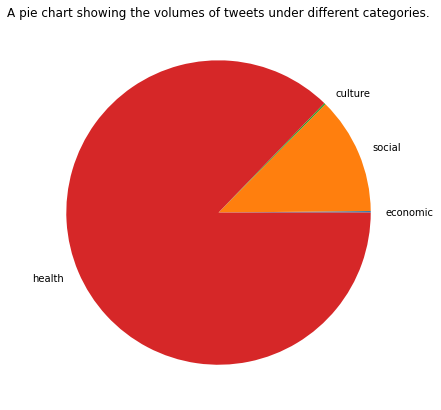

In [71]:

'''A pie chart to show the total number of tweets in each category'''

fig = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()

C:\Users\maryem gmach\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0, 0.5, 'total tweets')

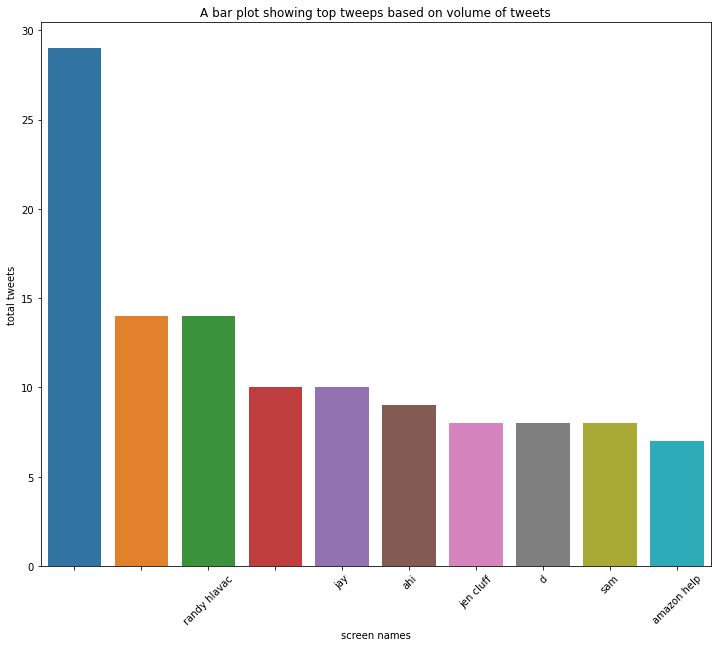

In [72]:
''' Users with most tweets'''

d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.total)
plt.title('A bar plot showing top tweeps based on volume of tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('total tweets')

### Distribution test and skewness¶


In [73]:
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler

In [74]:

# drop the totals row.
print(pivot_clusters.shape)
pivot_clusters.drop(pivot_clusters.tail(1).index,inplace=True)
print(pivot_clusters.shape)

(7929, 5)
(7928, 5)


C:\Users\maryem gmach\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)



 mu = 0.00 and sigma = 0.05



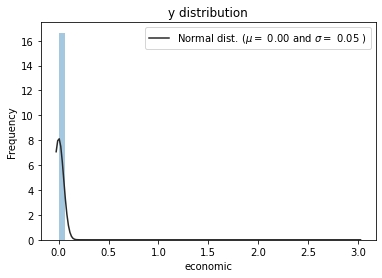

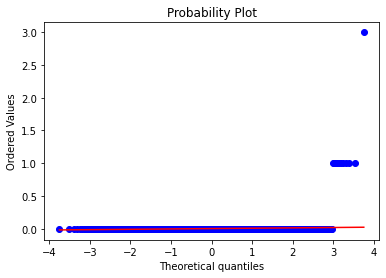

In [75]:
# Target variable
sns.distplot(pivot_clusters.economic , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.economic)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.title('Ecocnomy tweets distribution plot')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.economic, plot=plt)
plt.show()

C:\Users\maryem gmach\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)



 mu = 0.13 and sigma = 0.36



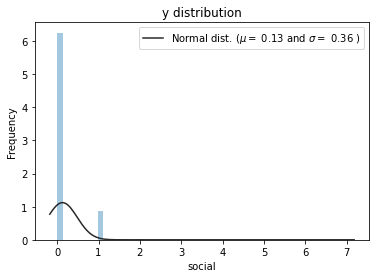

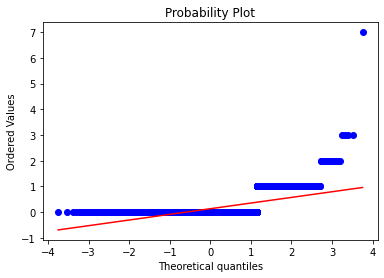

In [76]:

# Target variable
sns.distplot(pivot_clusters.social , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.social)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Social tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.social, plot=plt)
plt.show()

C:\Users\maryem gmach\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)



 mu = 0.00 and sigma = 0.05



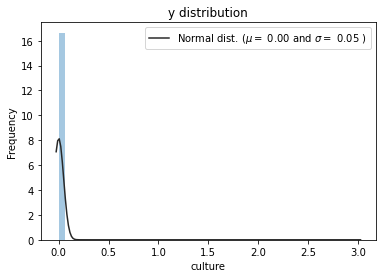

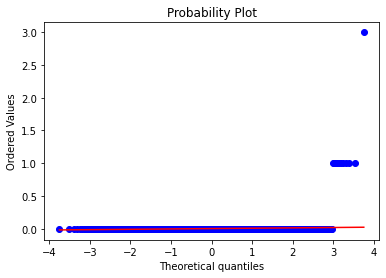

In [77]:

# Target variable
sns.distplot(pivot_clusters.culture , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.culture)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Culture tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.culture, plot=plt)
plt.show()

C:\Users\maryem gmach\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)



 mu = 0.91 and sigma = 0.90



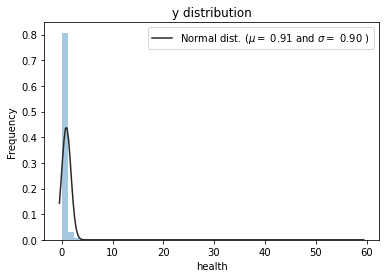

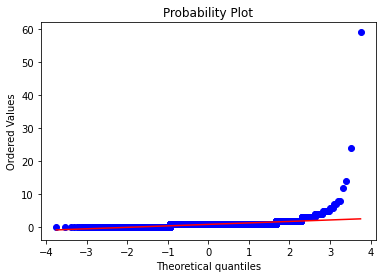

In [78]:

# Target variable
sns.distplot(pivot_clusters.health , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.health)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Health tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.health, plot=plt)
plt.show()

## KMeans Clustering

### 2D Clusters

### * Socio-Economic

<ipython-input-79-46983df45324>:9: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-79-46983df45324>:9: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)


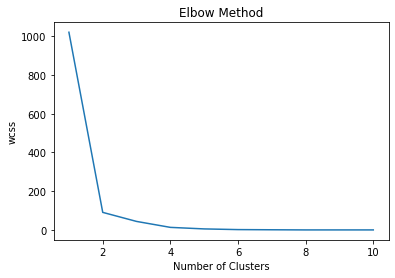

In [79]:

# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['economic', 'social']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

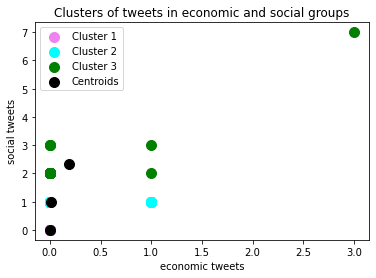

In [80]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('economic tweets')
plt.ylabel('social tweets')
plt.legend()
plt.show()

### * Socio-Culture

<ipython-input-81-0715ee276420>:9: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-81-0715ee276420>:9: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)


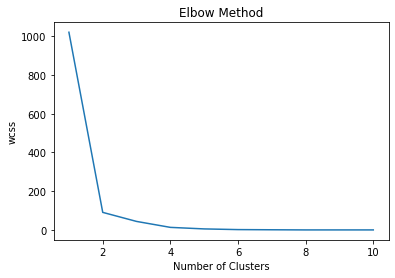

In [81]:
# X = pivot_clusters.iloc[:, [2,3]].values
X = pivot_clusters[['social', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

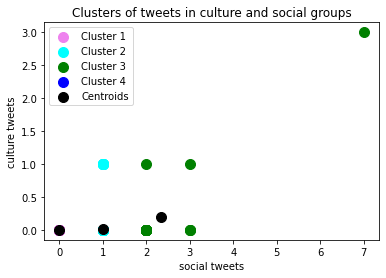

In [82]:

# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in culture and social groups')
plt.xlabel('social tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

### * Socio-Health


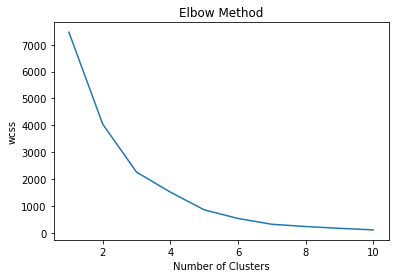

In [83]:

# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['social', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

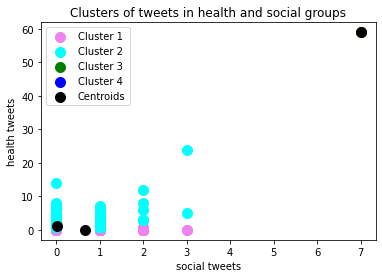

In [84]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in health and social groups')
plt.xlabel('social tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

###  *Economic-health

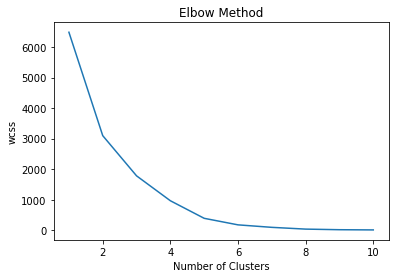

In [85]:
X = pivot_clusters[['economic', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

C:\Users\maryem gmach\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


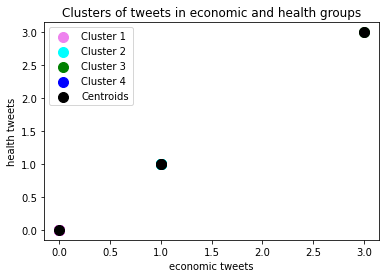

In [89]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and health groups')
plt.xlabel('economic tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

### *Economic-Culture 

<ipython-input-90-9bdd17d47674>:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-90-9bdd17d47674>:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-90-9bdd17d47674>:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-90-9bdd17d47674>:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-90-9bdd17d47674>:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-90-9bdd17d47674>:9: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_cluster

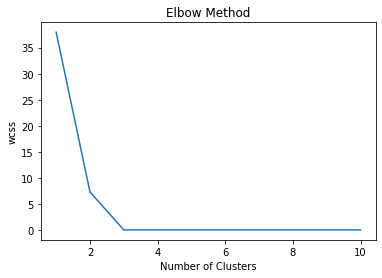

In [90]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

C:\Users\maryem gmach\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


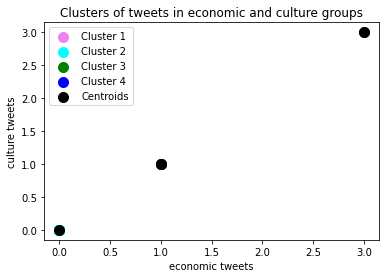

In [88]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and culture groups')
plt.xlabel('economic tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

### *Health-Culture

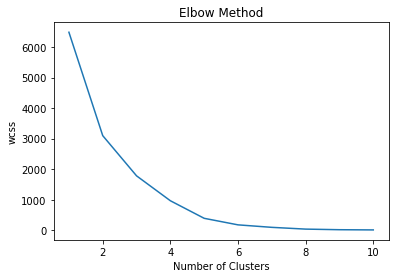

In [91]:

# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['health', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

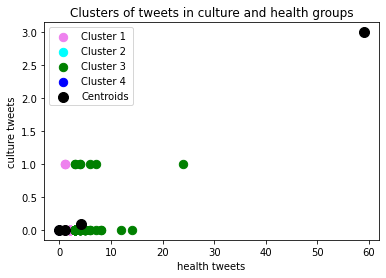

In [92]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=70, c='blue', label= 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in culture and health groups')
plt.xlabel('health tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

## KMeans with PCA

In [93]:
from sklearn.decomposition import PCA

In [94]:
seg = pivot_clusters.copy()
pca = PCA()
pca.fit(seg)

PCA()

In [95]:
pca.explained_variance_ratio_

array([9.00890179e-01, 9.71906099e-02, 1.91921120e-03, 1.71599261e-31,
       8.35545785e-37])

Text(0, 0.5, 'cummulative explained variance')

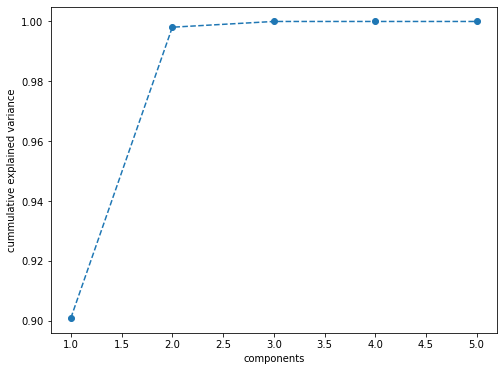

In [96]:
plt.figure(figsize = (8,6))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')

In [97]:
pca = PCA(n_components = 2)
pca.fit(seg)

PCA(n_components=2)

In [98]:
scores = pca.transform(seg)

Text(0, 0.5, 'wcss')

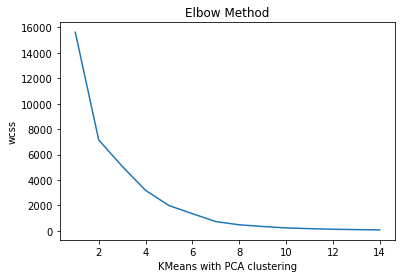

In [99]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('KMeans with PCA clustering')
plt.ylabel('wcss')

In [100]:
n = 4
kmeans_pca = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
kmeans_pca.fit(scores)

KMeans(n_clusters=4, random_state=0)

In [101]:
c = pd.concat([seg.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
c.columns.values[-2:] = ['component1', 'component2']
c['segment_kmeans_pca'] = kmeans_pca.labels_

In [102]:
c.tail()

,economic,social,culture,health,total,component1,component2,segment_kmeans_pca
7923,0,0,0,1,1,0.025392,-0.162222,1
7924,0,0,0,1,1,0.025392,-0.162222,1
7925,0,0,0,1,1,0.025392,-0.162222,1
7926,0,0,0,1,1,0.025392,-0.162222,1
7927,0,0,0,1,1,0.025392,-0.162222,1


Text(0.5, 1.0, 'Clusters by PCA')

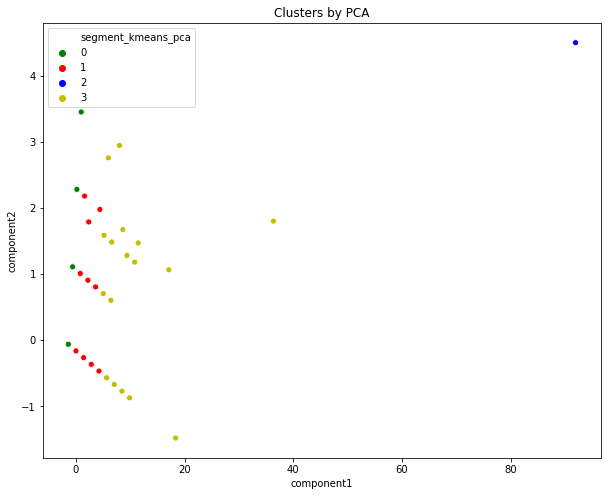

In [103]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = c['component1'], y = c['component2'], hue = c['segment_kmeans_pca'], palette = ['g', 'r', 'b', 'y'])
plt.title('Clusters by PCA')